___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [101]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [102]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\vf_ga\OneDrive\Documentos\2º Semestre Eng\Ciencia dos Dados\Projeto 1\Dados


In [103]:
#Se usar o arquivo descompactado
#dados = pd.read_csv("DOM2015.csv")
#dados

#Se usar o arquivo compactado como está no dropbox púbico
dados=pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

dados=pd.DataFrame(dados)

In [104]:
dadosFinal = dados.loc[:,["UF",'V4105',"V0226","V02322","V4621"]]
dadosFinal = dadosFinal.dropna()

In [105]:
def UFparaRegiao(linha):
    codigoRegiao=int(linha/10)
    if codigoRegiao==1:
        return 'Norte'
    if codigoRegiao==2:
        return 'Nordeste'
    if codigoRegiao==3:
        return 'Suldeste'
    if codigoRegiao==4:
        return 'Sul'
    if codigoRegiao==5:
        return 'Centro Oeste'
    

In [106]:
def UrbanoRural(linha):
    if linha==1 or linha==2 or linha==3:
        return 'Urbana'
    if linha==3 or linha==4 or linha==5 or linha==6 or linha==7 or linha==8:
        return 'Rural'

In [107]:
def RendaPerCapita(renda):
    return float(renda)

In [108]:
UFparaRegiao(dados['UF'][50001])

'Nordeste'

In [109]:
UrbanoRural(dados['V4105'][50001])

'Rural'

In [110]:
RendaPerCapita(dados['V4621'][50002])

788.0

In [111]:
dados['Regiao'] = dados.UF.apply(UFparaRegiao)

In [112]:
dados['Meio'] = dados.V4105.apply(UrbanoRural)

In [113]:
dados['Renda'] = dados.V4621.apply(RendaPerCapita)

In [114]:
dadosFinal = dados.loc[:,["Regiao", 'Meio', 'Renda', "V0226", "V02322"]]

In [115]:
dadosFinal = dadosFinal.dropna()

In [116]:
#dadosFinal = dadosFinal[(dadosFinal.V0226>1)]

In [117]:
#dadosFinal = dadosFinal[(dadosFinal.V02322>1)]


In [118]:
#dadosFinal = dadosFinal[(dadosFinal.Regiao=="Sul") | (dadosFinal.Regiao=="Norte") | (dadosFinal.Regiao=="Nordeste") | (dadosFinal.Regiao=="Suldeste") | (dadosFinal.Regiao=="Centro Oeste")]

In [119]:
dadosFinal.V0226 = dadosFinal.V0226.astype('category')
dadosFinal.V0226.cat.categories = (['Sim', 'Nao'])
dadosFinal.V02322 = dadosFinal.V02322.astype('category')
dadosFinal.V02322.cat.categories = (['Sim', 'Nao'])
dadosFinal = dadosFinal[(dadosFinal.Renda<999999999999) & (dadosFinal.Renda>0)]
dadosFinal.Renda = dadosFinal.Renda.astype('float')
dadosFinal = dadosFinal.rename(columns={'V0226': 'TV'})
dadosFinal = dadosFinal.rename(columns={'V02322': 'Internet'})

In [120]:
def TvInternet(TV,Internet):
    if TV == 'Sim':
        if Internet == 'Nao':
            return 'So TV'
        if Internet == 'Sim':
            return 'Ambos'
    if TV == 'Nao':
        if Internet == 'Sim':
            return 'So Internet'
        if Internet == 'Nao':
            return 'Nenhum'

In [121]:
TvInternet(dadosFinal['TV'][50001],dadosFinal['Internet'][50001])

'Ambos'

In [122]:
dadosFinal['TvInternet'] = dadosFinal.apply(lambda row: TvInternet(row['TV'], row['Internet']), axis=1)
dadosFinal

,Regiao,Meio,Renda,TV,Internet,TvInternet
0,Norte,Urbana,800.0,Sim,Nao,So TV
2,Norte,Urbana,1150.0,Nao,Sim,So Internet
3,Norte,Urbana,793.0,Sim,Sim,Ambos
4,Norte,Urbana,2900.0,Nao,Nao,Nenhum
5,Norte,Urbana,1990.0,Sim,Sim,Ambos
6,Norte,Urbana,350.0,Sim,Nao,So TV
7,Norte,Urbana,1333.0,Sim,Nao,So TV
8,Norte,Urbana,818.0,Sim,Sim,Ambos
10,Norte,Urbana,1716.0,Sim,Sim,Ambos
11,Norte,Urbana,2500.0,Sim,Sim,Ambos


In [123]:
#Contanto Dados Regiao
print('Pessoas Morando em Diferntes Regioes')
dadosRegiao = dadosFinal.Regiao.value_counts().reindex(['Norte', 'Nordeste', 'Suldeste', 'Sul', 'Centro Oeste'])
dadosRegiao

Pessoas Morando em Diferntes Regioes


Norte           16494
Nordeste        32051
Suldeste        34940
Sul             18913
Centro Oeste    12219
Name: Regiao, dtype: int64

In [124]:
#Contando Dados Internet
print('Pessoas que tem Internet')
dadosInternet = dadosFinal.Internet.value_counts().reindex(['Sim', 'Nao'])
dadosInternet

Pessoas que tem Internet


Sim    66001
Nao    48616
Name: Internet, dtype: int64

In [125]:
#Contando Dados TV
print('Pessoas que tem TV')
dadosTV = dadosFinal.TV.value_counts().reindex(['Sim', 'Nao'])
dadosTV

Pessoas que tem TV


Sim    111009
Nao      3608
Name: TV, dtype: int64

In [126]:
#Contando Dados Meio
print('Pessoas Vivendo em que Meio')
dadosMeio = dadosFinal.Meio.value_counts().reindex(['Urbana', 'Rural'])
dadosMeio

Pessoas Vivendo em que Meio


Urbana    98804
Rural     15813
Name: Meio, dtype: int64

In [127]:
#Tabelas Univariadas
print('Pessoas morando em Regioes (%)')
RegioesPorCento = (dadosFinal.Regiao.value_counts(normalize=True)*100).round(decimals=1).reindex(['Norte', 'Nordeste', 'Suldeste', 'Sul', 'Centro Oeste'])
print(RegioesPorCento,'\n')

print('Pessoas que tem Internet (%)')
InternetPorCento = (dadosFinal.Internet.value_counts(normalize=True)*100).round(decimals=1).reindex(['Sim','Nao'])
print(InternetPorCento,'\n')

print('Pessoas que tem TV (%)')
TVPorCento = (dadosFinal.TV.value_counts(normalize=True)*100).round(decimals=1).reindex(['Sim','Nao'])
print(TVPorCento,'\n')

print('Pessoas que Vivem em Diferentes Meios (%)')
MeioPorCento = (dadosFinal.Meio.value_counts(normalize=True)*100).round(decimals=1).reindex(['Urbana','Rural'])
print(MeioPorCento,'\n')

Pessoas morando em Regioes (%)
Norte           14.4
Nordeste        28.0
Suldeste        30.5
Sul             16.5
Centro Oeste    10.7
Name: Regiao, dtype: float64 

Pessoas que tem Internet (%)
Sim    57.6
Nao    42.4
Name: Internet, dtype: float64 

Pessoas que tem TV (%)
Sim    96.9
Nao     3.1
Name: TV, dtype: float64 

Pessoas que Vivem em Diferentes Meios (%)
Urbana    86.2
Rural     13.8
Name: Meio, dtype: float64 



Tabela Absoluta
Regiao  Centro Oeste  Nordeste  Norte    Sul  Suldeste    All
Meio                                                         
Urbana         10989     25463  13089  16731     32532  98804
Rural           1230      6588   3405   2182      2408  15813 

Tabela em Porcentagem
Meio          Urbana  Rural
Regiao                     
Norte           11.4    3.0
Nordeste        22.2    5.7
Suldeste        28.4    2.1
Sul             14.6    1.9
Centro Oeste     9.6    1.1 



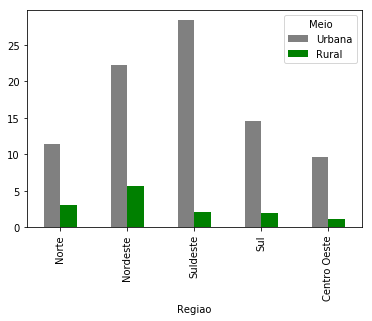

In [128]:
#Regioes separando Urbano e RURAL
ct=pd.crosstab(dadosFinal.Meio,dadosFinal.Regiao,margins=True,rownames=['Meio'], colnames=['Regiao'])
ct=ct.loc[['Urbana','Rural']]
print('Tabela Absoluta')
print(ct,'\n')

print('Tabela em Porcentagem')
ct1=(pd.crosstab(dadosFinal.Regiao,dadosFinal.Meio,margins=True,rownames=['Regiao'], colnames=['Meio'], normalize='all')*100).round(decimals=1)
ct1=ct1.loc[['Norte', 'Nordeste', 'Suldeste', 'Sul', 'Centro Oeste'],['Urbana','Rural']]
print(ct1,'\n')

ct1.plot(kind='bar', color=('grey', 'green'))



Tabela em Porcentagem
TV             Sim  Nao
Regiao                 
Norte         13.5  0.9
Nordeste      27.0  1.0
Suldeste      29.9  0.5
Sul           16.2  0.3
Centro Oeste  10.3  0.4 

TV             Sim  Nao
Regiao                 
Norte         13.5  0.9
Nordeste      27.0  1.0
Suldeste      29.9  0.5
Sul           16.2  0.3
Centro Oeste  10.3  0.4 



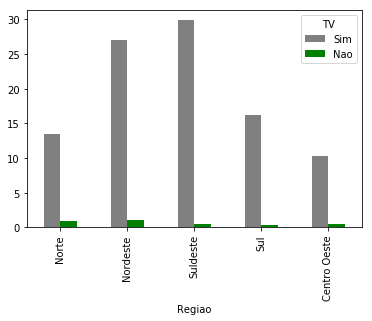

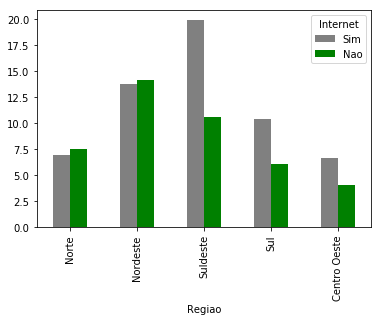

In [129]:
print('Tabela em Porcentagem')
ct2=(pd.crosstab(dadosFinal.Regiao,dadosFinal.TV,margins=True,rownames=['Regiao'], colnames=['TV'], normalize='all')*100).round(decimals=1)
ct2=ct2.loc[['Norte', 'Nordeste', 'Suldeste', 'Sul', 'Centro Oeste'],['Sim','Nao']]
print(ct2,'\n')

ct2.plot(kind='bar', color=('grey', 'green'))

ct3=(pd.crosstab(dadosFinal.Regiao,dadosFinal.Internet,margins=True,rownames=['Regiao'], colnames=['Internet'], normalize='all')*100).round(decimals=1)
ct3=ct3.loc[['Norte', 'Nordeste', 'Suldeste', 'Sul', 'Centro Oeste'],['Sim','Nao']]
print(ct2,'\n')

ct3.plot(kind='bar', color=('grey', 'green'))

Tv ou Internet  Ambos  Nenhum  So Internet  So TV
Regiao                                           
Norte             6.7     0.8          0.1    6.8
Nordeste         13.7     0.8          0.2   13.3
Suldeste         19.7     0.4          0.2   10.2
Sul              10.3     0.2          0.1    5.9
Centro Oeste      6.5     0.3          0.1    3.8 



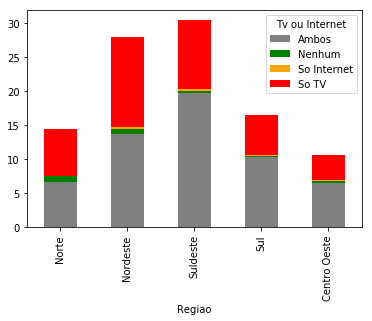

In [130]:
ct4=(pd.crosstab(dadosFinal.Regiao,dadosFinal.TvInternet,margins=True,rownames=['Regiao'], colnames=['Tv ou Internet'], normalize='all')*100).round(decimals=1)
ct4=ct4.loc[['Norte', 'Nordeste', 'Suldeste', 'Sul', 'Centro Oeste'],['Ambos','Nenhum','So Internet','So TV']]
print(ct4,'\n')
ct4.plot(kind='bar', color=('grey', 'green','orange','red'),stacked=True)


In [131]:
#faixa = np.arange(937, ,3.5)
dadosFinal.Renda.describe().round(decimals=2)


count    114617.00
mean       1257.76
std        1962.37
min           5.00
25%         425.00
50%         788.00
75%        1333.00
max      150000.00
Name: Renda, dtype: float64

In [132]:
dadosNorte = dadosFinal[(dadosFinal.Regiao=='Norte')]
dadosSul = dadosFinal[(dadosFinal.Regiao=='Sul')]
dadosNordeste = dadosFinal[(dadosFinal.Regiao=='Nordeste')]
dadosSuldeste = dadosFinal[(dadosFinal.Regiao=='Suldeste')]
dadosCentroOeste = dadosFinal[(dadosFinal.Regiao=='Centro Oeste')]
print(dadosNorte.Renda.sum())
print(dadosSul.Renda.sum())
print(dadosNordeste.Renda.sum())
print(dadosSuldeste.Renda.sum())
print(dadosCentroOeste.Renda.sum())

dadosNorteUrbana = dadosNorte[(dadosNorte.Meio=='Urbana')]
dadosNorteRural = dadosNorte[(dadosNorte.Meio=='Rural')]
print('Oi')
print(dadosNorteUrbana.Renda.sum())
print(dadosNorteRural.Renda.sum())



14945040.0
30004181.0
27339546.0
52316342.0
19555043.0
Oi
12777295.0
2167745.0


Norte Urbana
12777295.0
Norte Rural
2167745.0


<Container object of 2 artists>

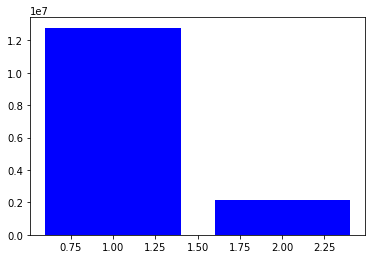

In [133]:
#Norte
dadosNorteUrbana = dadosNorte[(dadosNorte.Meio=='Urbana')]
dadosNorteRural = dadosNorte[(dadosNorte.Meio=='Rural')]
print('Norte Urbana')
DadosNorteUrbanaRendaSomada = dadosNorteUrbana.Renda.sum()
print(DadosNorteUrbanaRendaSomada)
print('Norte Rural')
DadosNorteRuralRendaSomada = dadosNorteRural.Renda.sum()
print(DadosNorteRuralRendaSomada)

DadosNorteRendaSomada = [dadosNorteUrbana.Renda.sum() , dadosNorteRural.Renda.sum()]
TotalNorte = dadosNorteUrbana.Renda.sum() + dadosNorteRural.Renda.sum()
plt.bar([1,2],DadosNorteRendaSomada, color="blue")

In [135]:
#ct5.plot(kind='bar', color=('#f39c12', '#9b59b6','#2ecc71','#e74c3c','#bdc3c7','#f1c40f','#1abc9c','#34495e','#7f8c8d'))

In [139]:
ct5=(pd.crosstab([dadosFinal.Regiao],[dadosFinal.TvInternet,dadosFinal.Meio],rownames=['Regiao'], colnames=['TvInternet','Meio'],normalize="index")*100).round(decimals=2)
ct5=ct5.loc[['Norte', 'Nordeste', 'Suldeste', 'Sul', 'Centro Oeste']]
ct5

TvInternet   Ambos        Nenhum        So Internet         So TV       
Meio         Rural Urbana  Rural Urbana       Rural Urbana  Rural Urbana
Regiao                                                                  
Norte         2.57  44.15   3.44   1.92        0.05   0.95  14.59  32.34
Nordeste      3.54  45.32   1.65   1.33        0.05   0.50  15.32  32.29
Suldeste      1.98  62.69   0.27   0.99        0.02   0.52   4.62  28.91
Sul           3.80  58.62   0.40   0.87        0.06   0.65   7.28  28.33
Centro Oeste  2.40  58.40   0.71   1.66        0.08   1.04   6.87  28.83

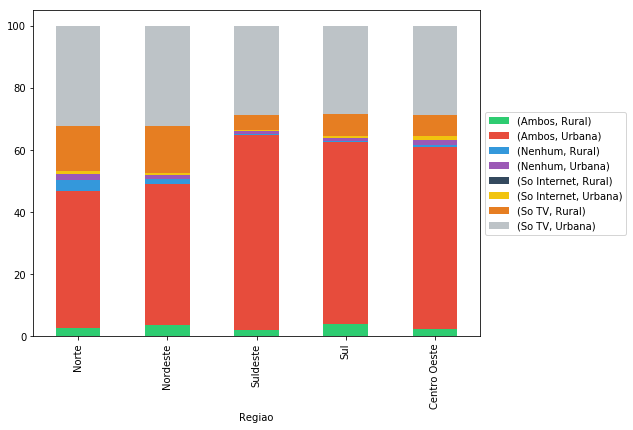

In [151]:
ct5.plot(kind='bar', color=('#2ecc71', '#e74c3c','#3498db','#9b59b6','#34495e','#f1c40f','#e67e22','#bdc3c7'),figsize=(10,6),stacked=True)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
ct6=(pd.crosstab(dadosFinal.Regiao,dadosFinal.Renda.sum(),rownames=['Regiao'], colnames=['Meio']))
ct6

In [ ]:
dadosFinal.to_csv("dadosFinal")

___
## Conclusão 

Descreva aqui suas conclusões!